# Goal reminder 🎯

Use the dataset to understand what makes people interested into each other to go on a second date together:
* You may use descriptive statistics
* You may use visualisations

In [37]:
import numpy as np
import pandas as pd
import chardet
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Basic information
Pandas returns an error when trying to read the provided .csv; default encoding for reading is utf-8, but doesn't match our file.

Let's use the **chardet** library then to identify that encoding and display some basic informations about our dataset!

In [38]:
with open("Speed+Dating+Data.csv", "rb") as original_file:
    data_to_decode = original_file.read()
encoding_result = chardet.detect(data_to_decode)
detected_encoding = encoding_result["encoding"]
print(detected_encoding)

MacRoman


In [39]:
df_original = pd.read_csv("Speed+Dating+Data.csv", encoding=detected_encoding)
df_original.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [40]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Considering the object dtype above, let's make sure to include all dtypes:

In [41]:
df_original.describe(include="all")

iid           id       gender          idg       condtn  \
count   8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     283.675937     8.960248     0.500597    17.327166     1.828837   
std      158.583367     5.491329     0.500029    10.940735     0.376673   
min        1.000000     1.000000     0.000000     1.000000     1.000000   
25%      154.000000     4.000000     0.000000     8.000000     2.000000   
50%      281.000000     8.000000     1.000000    16.000000     2.000000   
75%      407.000000    13.000000     1.000000    26.000000     2.000000   
max      552.000000    22.000000     1.000000    44.000000     2.000000   

               wave        round     position     positin1        order  ...  \
count   8378.000000  8378.000000  8378.000000  6532.000000  8378.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean      11.350919    16.872046     9.042731     9.295775     8.927668  ...   
std        5.995903     4.358458     5.514939     5.650199     5.477009  ...   
min        1.000000     5.000000     1.000000     1.000000     1.000000  ...   
25%        7.000000    14.000000     4.000000     4.000000     4.000000  ...   
50%       11.000000    18.000000     8.000000     9.000000     8.000000  ...   
75%       15.000000    20.000000    13.000000    14.000000    13.000000  ...   
max       21.000000    22.000000    22.000000    22.000000    22.000000  ...   

            attr3_3      sinc3_3     intel3_3       fun3_3       amb3_3  \
count   3974.000000  3974.000000  3974.000000  3974.000000  3974.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       7.240312     8.093357     8.388777     7.658782     7.391545   
std        1.576596     1.610309     1.459094     1.744670     1.961417   
min        2.000000     2.000000     3.000000     2.000000     1.000000   
25%        7.000000     7.000000     8.000000     7.000000     6.000000   
50%        7.000000     8.000000     8.000000     8.000000     8.000000   
75%        8.000000     9.000000     9.000000     9.000000     9.000000   
max       12.000000    12.000000    12.000000    12.000000    12.000000   

            attr5_3      sinc5_3     intel5_3       fun5_3       amb5_3  
count   2016.000000  2016.000000  2016.000000  2016.000000  2016.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       6.810020     7.615079     7.932540     7.155258     7.048611  
std        1.507341     1.504551     1.340868     1.672787     1.717988  
min        2.000000     2.000000     4.000000     1.000000     1.000000  
25%        6.000000     7.000000     7.000000     6.000000     6.000000  
50%        7.000000     8.000000     8.000000     7.000000     7.000000  
75%        8.000000     9.000000     9.000000     8.000000     8.000000  
max       10.000000    10.000000    10.000000    10.000000    10.000000  

[11 rows x 195 columns]

Next comes our bane - the mean null values. Now for a quick glimpse of what awaits us, thanks to the **missingno** library:

<Axes: >

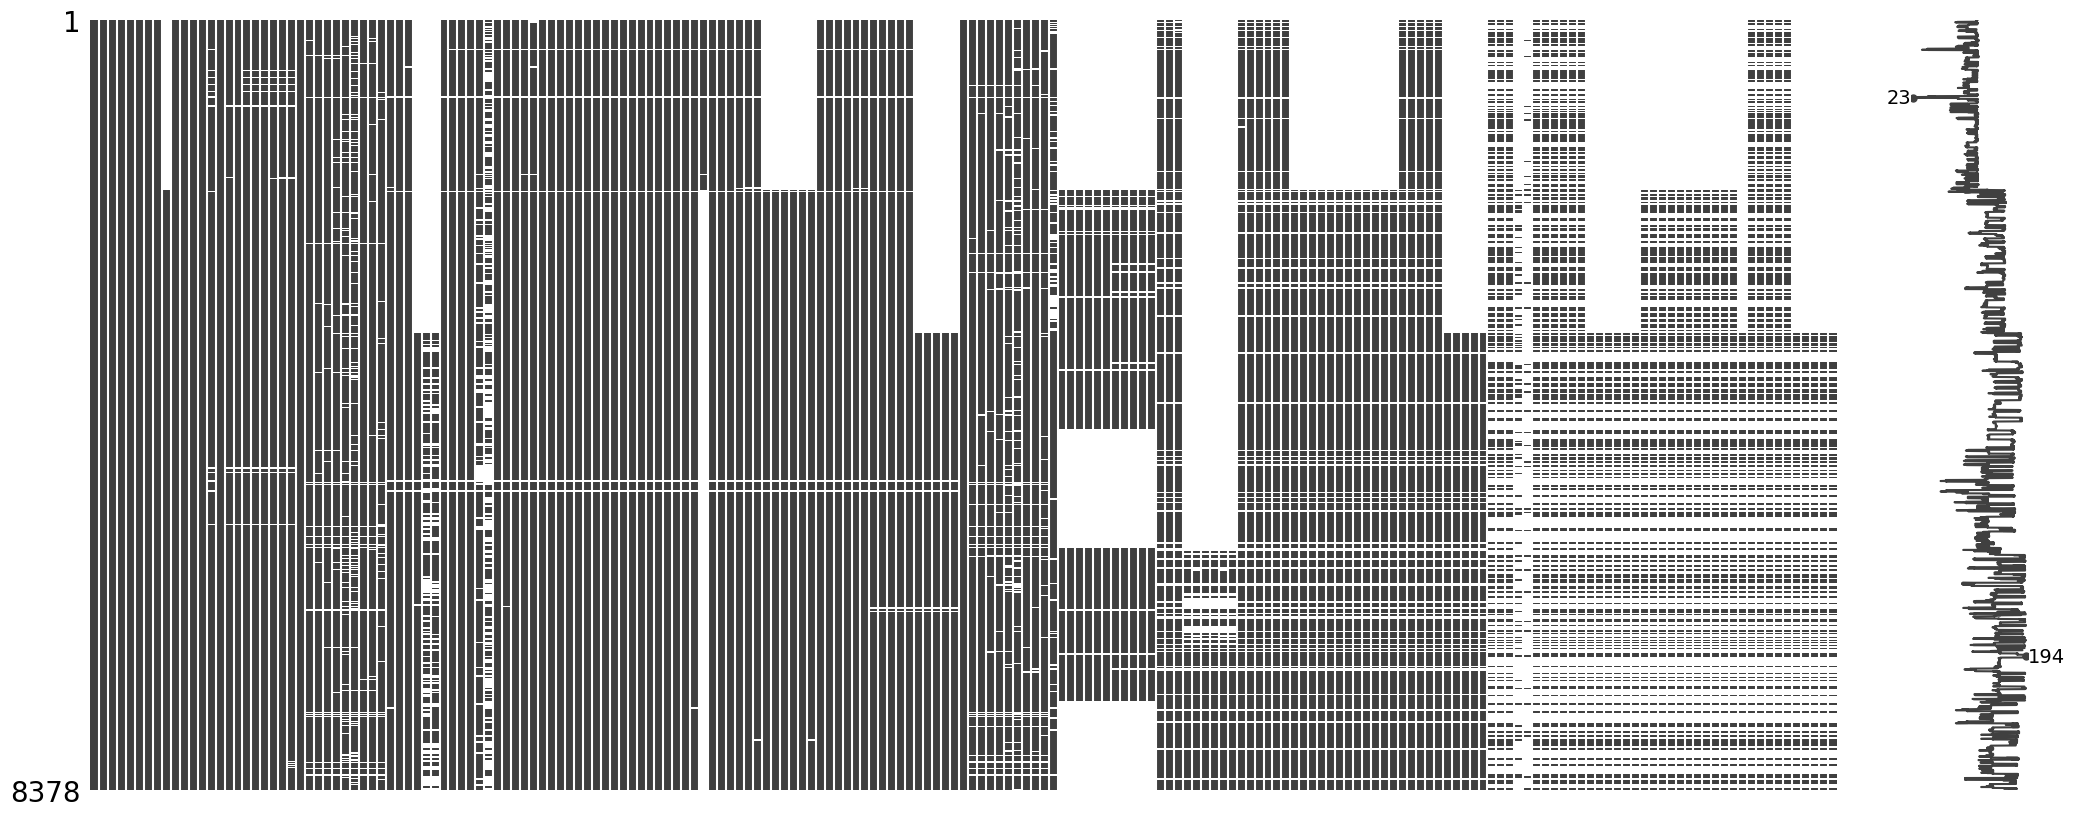

In [42]:
msno.matrix(df_original)

Can't exactly pretend we never saw that now! Should we francophones sing a bit of Gainsbourg together?

*Des p'tits trous, des p'tits trous, toujours des p'tits trous...*

This shouldn't intimidate us, we'll leave the *poinçonneur des lilas* behind. Only one way to go: forward!

In [43]:
print(df_original.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

# At first glance

We've just displayed each column's name; the provided .docx file explains extensively their meaning & contents.

These numbers easily get confusing yet follow a logic, so first comes a reminder of said meaning to make sense of half of these columns:

**Prefixes**
* 1_ | Attributes looked for __in__ other sex (candidate's opinion)
* 2_ | Attributes looked for __by__ other sex (candidate's opinion)
* 3_ | Self-rating of attributes (candidate's opinion **about** themself)
* 4_ | Attributes looked for __by__ other people of __the candidate's__ sex (candidate's opinion)
* 5_ | Self-rating of attributes (based on what the candidate thinks __others__ perceived about said candidate)  
* 7_ | Rating of importance of attributes (always past the event), in contributing to the candidate's decisions 

**Suffixes**
* _1 | Filled out before event  
* _s | Filled out halfway through the event  
* _2 | Filled out a day after the event  
* _3 | Filled out 3-4 weeks after the event  

From here, let's start digging into some "general" information without considering a specific group. Some columns easily attract attention:

* 'gender': 0=Female, 1=Male; is one gender more represented or is the distribution of our candidates even?
* 'race': are one or several racial characteristics underrepresented amongst our candidates?
* 'age': age given by candidates during their signup to the speed dating; is there a particular range most represented?
* 'goal': what are candidates looking forward to when joining Tinder's events?

In [44]:
# First comes the gender; though hard to read, our earlier msno matrix shows no missing values here.
df_sex = df_original.groupby("iid")["gender"].mean().reset_index()
ladies = df_sex[df_sex["gender"] == 0]
gentlemen = df_sex[df_sex["gender"] == 1]

df_gender_pie = pd.DataFrame([{"gender": "ladies", "count": len(ladies)}, {"gender": "gentlemen", "count": len(gentlemen)}])

fig_gender_pie = px.pie(df_gender_pie, names="gender", values="count", color_discrete_sequence=["#fd5564"])

fig_gender_pie.update_layout(title={"text": "<b>Gender distribution during speed datings<b>", "x": 0.5})
fig_gender_pie.show()

Genders are close to a perfectly even distribution. What of racial characteristics?

In [45]:
df_race = df_original.groupby("iid")["race"].mean().reset_index()
Black_African = df_race[df_race["race"] == 1]
European_Caucasian = df_race[df_race["race"] == 2]
Latino_Hispanic = df_race[df_race["race"] == 3]
Asian_Pacific_Islander = df_race[df_race["race"] == 4]
Native_American = df_race[df_race["race"] == 5]
Others = df_race[df_race["race"] == 6]

df_race_pie = pd.DataFrame([{"race": "Black_African", "count": len(Black_African)},
                   {"race": "European_Caucasian","count": len(European_Caucasian)},
                   {"race": "Latino_Hispanic", "count": len(Latino_Hispanic)},
                   {"race": "Asian_Pacific_Islander", "count": len(Asian_Pacific_Islander)},
                   {"race": "Native_American", "count": len(Native_American)},
                   {"race": "Others", "count": len(Others)},
                   ])

fig_race_pie = px.pie(df_race_pie, names="race", values="count")

fig_race_pie.update_layout(title={ "text": "<b>Race distribution during speed datings<b>", "x": 0.5})
fig_race_pie.show()

We can notice together, European Caucasians & Asian/Pacific Islanders represent over 80% of our candidates.

What little this tells us is, trying to produce an insight using race as a decision factor for new dates would involve losing a massive amount of data.

It would take trying to get on an equal footing each population, with a vague "Others" category and extremely few Native American people.

Our case study doesn't seem appropriate to attempt exploring such a venue. How about taking a step back and considering the job background this time?

In [46]:
fig_jobs = px.histogram(df_original.career_c)
fig_jobs.show()

Reading over the .docx file, two categories lead the way by far:
* 2: this matches the academic/research background. We can surmise students would be included here.
* 7: this category involves many jobs - administration, finances, marketing and many more; so many it isn't surprising to represent so much people.

Job backgrounds are so focused on academics (likely students) and a wide range of services, it isn't a reliable source of information.

We mentioned the likeness of having students; how about considering the age?

In [47]:
print(f"Amount of missing values: {df_original.age.isnull().sum()} on {len(df_original.age)} entries.")

Amount of missing values: 95 on 8378 entries.


In [48]:
# We do have null values, but what is their proportion?
print(f"Missing values' proportion over the dataset: {df_original.age.isnull().sum()/len(df_original.age)*100:.2f}%.")

Missing values' proportion over the dataset: 1.13%.


In [49]:
# 1.13% is negligible enough to drop these:
df_age = df_original[['iid','age']]
df_age = df_age.dropna()
df_age.describe()

iid          age
count  8283.000000  8283.000000
mean    283.618858    26.358928
std     158.487239     3.566763
min       1.000000    18.000000
25%     155.000000    24.000000
50%     280.000000    26.000000
75%     408.000000    28.000000
max     552.000000    55.000000

In [50]:
# The age mean implies a younger population joining Tinder's events. Would age ranges help with readability?
np.sort(df_age.age.unique())

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 42., 55.])

In [51]:
# There is almost nobody participating starting 40 y.o., so we could've simplified our work with a basic histogram:
fig_all_ages = px.histogram(df_original.age)
fig_all_ages.show()

Now we can definitely notice how the 22 to 30 y.o. age range makes the bulk of our candidates, so we're mostly dealing with a younger population.

One last approach of our dataset. What are candidates joining the events for? As a reminder for the meaning of these numbers:

* 1 = Seemed like a fun night out
* 2 = To meet new people
* 3 = To get a date
* 4 = Looking for a serious relationship
* 5 = To say I did it
* 6 = Other

In [52]:
fig_goal = px.histogram(df_original.goal)
fig_goal.show()

Candidates seem to join for the sake of having fun and meeting new people. Let's sum up our basic insights so far:

We are mostly considering a younger population evenly distributed between women & men, joining for fun or to meet people.

Racial characteristics or job backgrounds are too risky a venture to identify a tendency in getting another date or not.

Without further ado, we'll dive deeper into our dataset to try and identify what factors influence the matches!

# Delving deeper

In [53]:
matching_factors = df_original[['iid', 'gender', 'age', 'race', 'wave', 'dec', 'match_es', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3']]
date_3 = matching_factors['date_3'].value_counts().sort_index()
numdat_3 = matching_factors['numdat_3'].value_counts().sort_index()
num_in_3 = matching_factors['num_in_3'].value_counts().sort_index()

print(f'{date_3} \n\n {numdat_3} \n\n {num_in_3}')

date_3
0.0    2476
1.0    1498
Name: count, dtype: int64 

 numdat_3
0.0    293
1.0    888
2.0    181
3.0     50
4.0     63
9.0     21
Name: count, dtype: int64 

 num_in_3
0.0    159
1.0    430
2.0     61
4.0     18
Name: count, dtype: int64


We've handpicked several columns on purpose:

* 'iid', 'gender', 'wave' for the sake of identifying our candidates and organizing if needed by such categories;
* 'age', 'race' expecting those as easy examples of correlation for (remember how Tinder works) swiping left or right;
* 'dec', 'match_es' as pivots first for how often a candidate declares a match, second as a possible measure of self-confidence in receiving a similar reply;
* 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3' as the markers of actual, bilateral matching and whether a date followed.

However we meet an issue with our markers: the 'date_3' column was expected according to the .docx to be filled by 1 & 2 values, but we have 0 & 1 instead.

We could *surmise* the meaning of these following other columns' filling, but no certitude. Let's try clarifying the real data's organization with a heatmap:

In [54]:
# First a global look over our slice of the original dataset:
matching_corr = matching_factors.corr()
matching_fig = px.imshow(matching_corr, text_auto=True, color_continuous_scale="RdBu_r", zmin=-1, zmax=1)
matching_fig.show()

This isn't looking great. Few insights to be taken from this quick view:
* 'age' & 'race' do not seem meaningful here for matching or dating. Archetypes defeated - a positive note, though this doesn't ease our work!
* 'dec' & 'match_es' also have little correlation - not significant enough a value to tell much about it.
* our remaining markers for matching/dating show more promise. Let's zoom in on them!

In [55]:
actual_match_date = matching_factors[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].corr()
fig = px.imshow(actual_match_date, text_auto=True, color_continuous_scale="RdBu_r", zmin=-1, zmax=1)
fig.show()

More things to notice here:
* The negative: 'date_3', 'numdat_3' & 'num_in_3' have no 1:1 correlation. 'numdat_3' & 'num_in_3' descriptions look the same and are confusing, so without any further details we're left doubtful about how to use these columns.
* The positive: 'them_cal' is strongly correlated with all three of the columns above, marking it as a strong factor in getting an actual date.

With that being said, let us backtrack a bit and remember which data is at our disposal:
* We do have each candidate's opinion in their interests and what they think about others, as well as about themselves - this is what we described at the start in "At first glance".
* We lack the score cards filled by candidates about the people they meet.

This involves another issue: factors in getting a call (likely, from scoring somebody else highly on said cards) are not included in our dataset.

Looks like a dead end sadly. Let's try shifting the point of view, from the *receiver* to the call *sender*; we *do* have each candidate's opinion. Is there something we could make use of there?

In [56]:
# For a first attempt: using our earlier matching/dating markers and adding attributes, let's try something with the informations given when registering.

info_list_step_1 = ['iid', 'gender', 'match',
                    'attr1_1', 'sinc1_1', 'intel1_1', 
                    'fun1_1', 'amb1_1','shar1_1', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

df_step_1 = df_original[info_list_step_1]
df_step_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   gender    8378 non-null   int64  
 2   match     8378 non-null   int64  
 3   attr1_1   8299 non-null   float64
 4   sinc1_1   8299 non-null   float64
 5   intel1_1  8299 non-null   float64
 6   fun1_1    8289 non-null   float64
 7   amb1_1    8279 non-null   float64
 8   shar1_1   8257 non-null   float64
 9   you_call  3974 non-null   float64
 10  date_3    3974 non-null   float64
 11  numdat_3  1496 non-null   float64
 12  num_in_3  668 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 851.0 KB


Lots of missing values, but this is expected given we're considering people who actually got a date for our analysis' goal.

We'll use **seaborn** to display extensive plots in looking for actual correlations. Feel free to skip to the next markdown cell for insights:

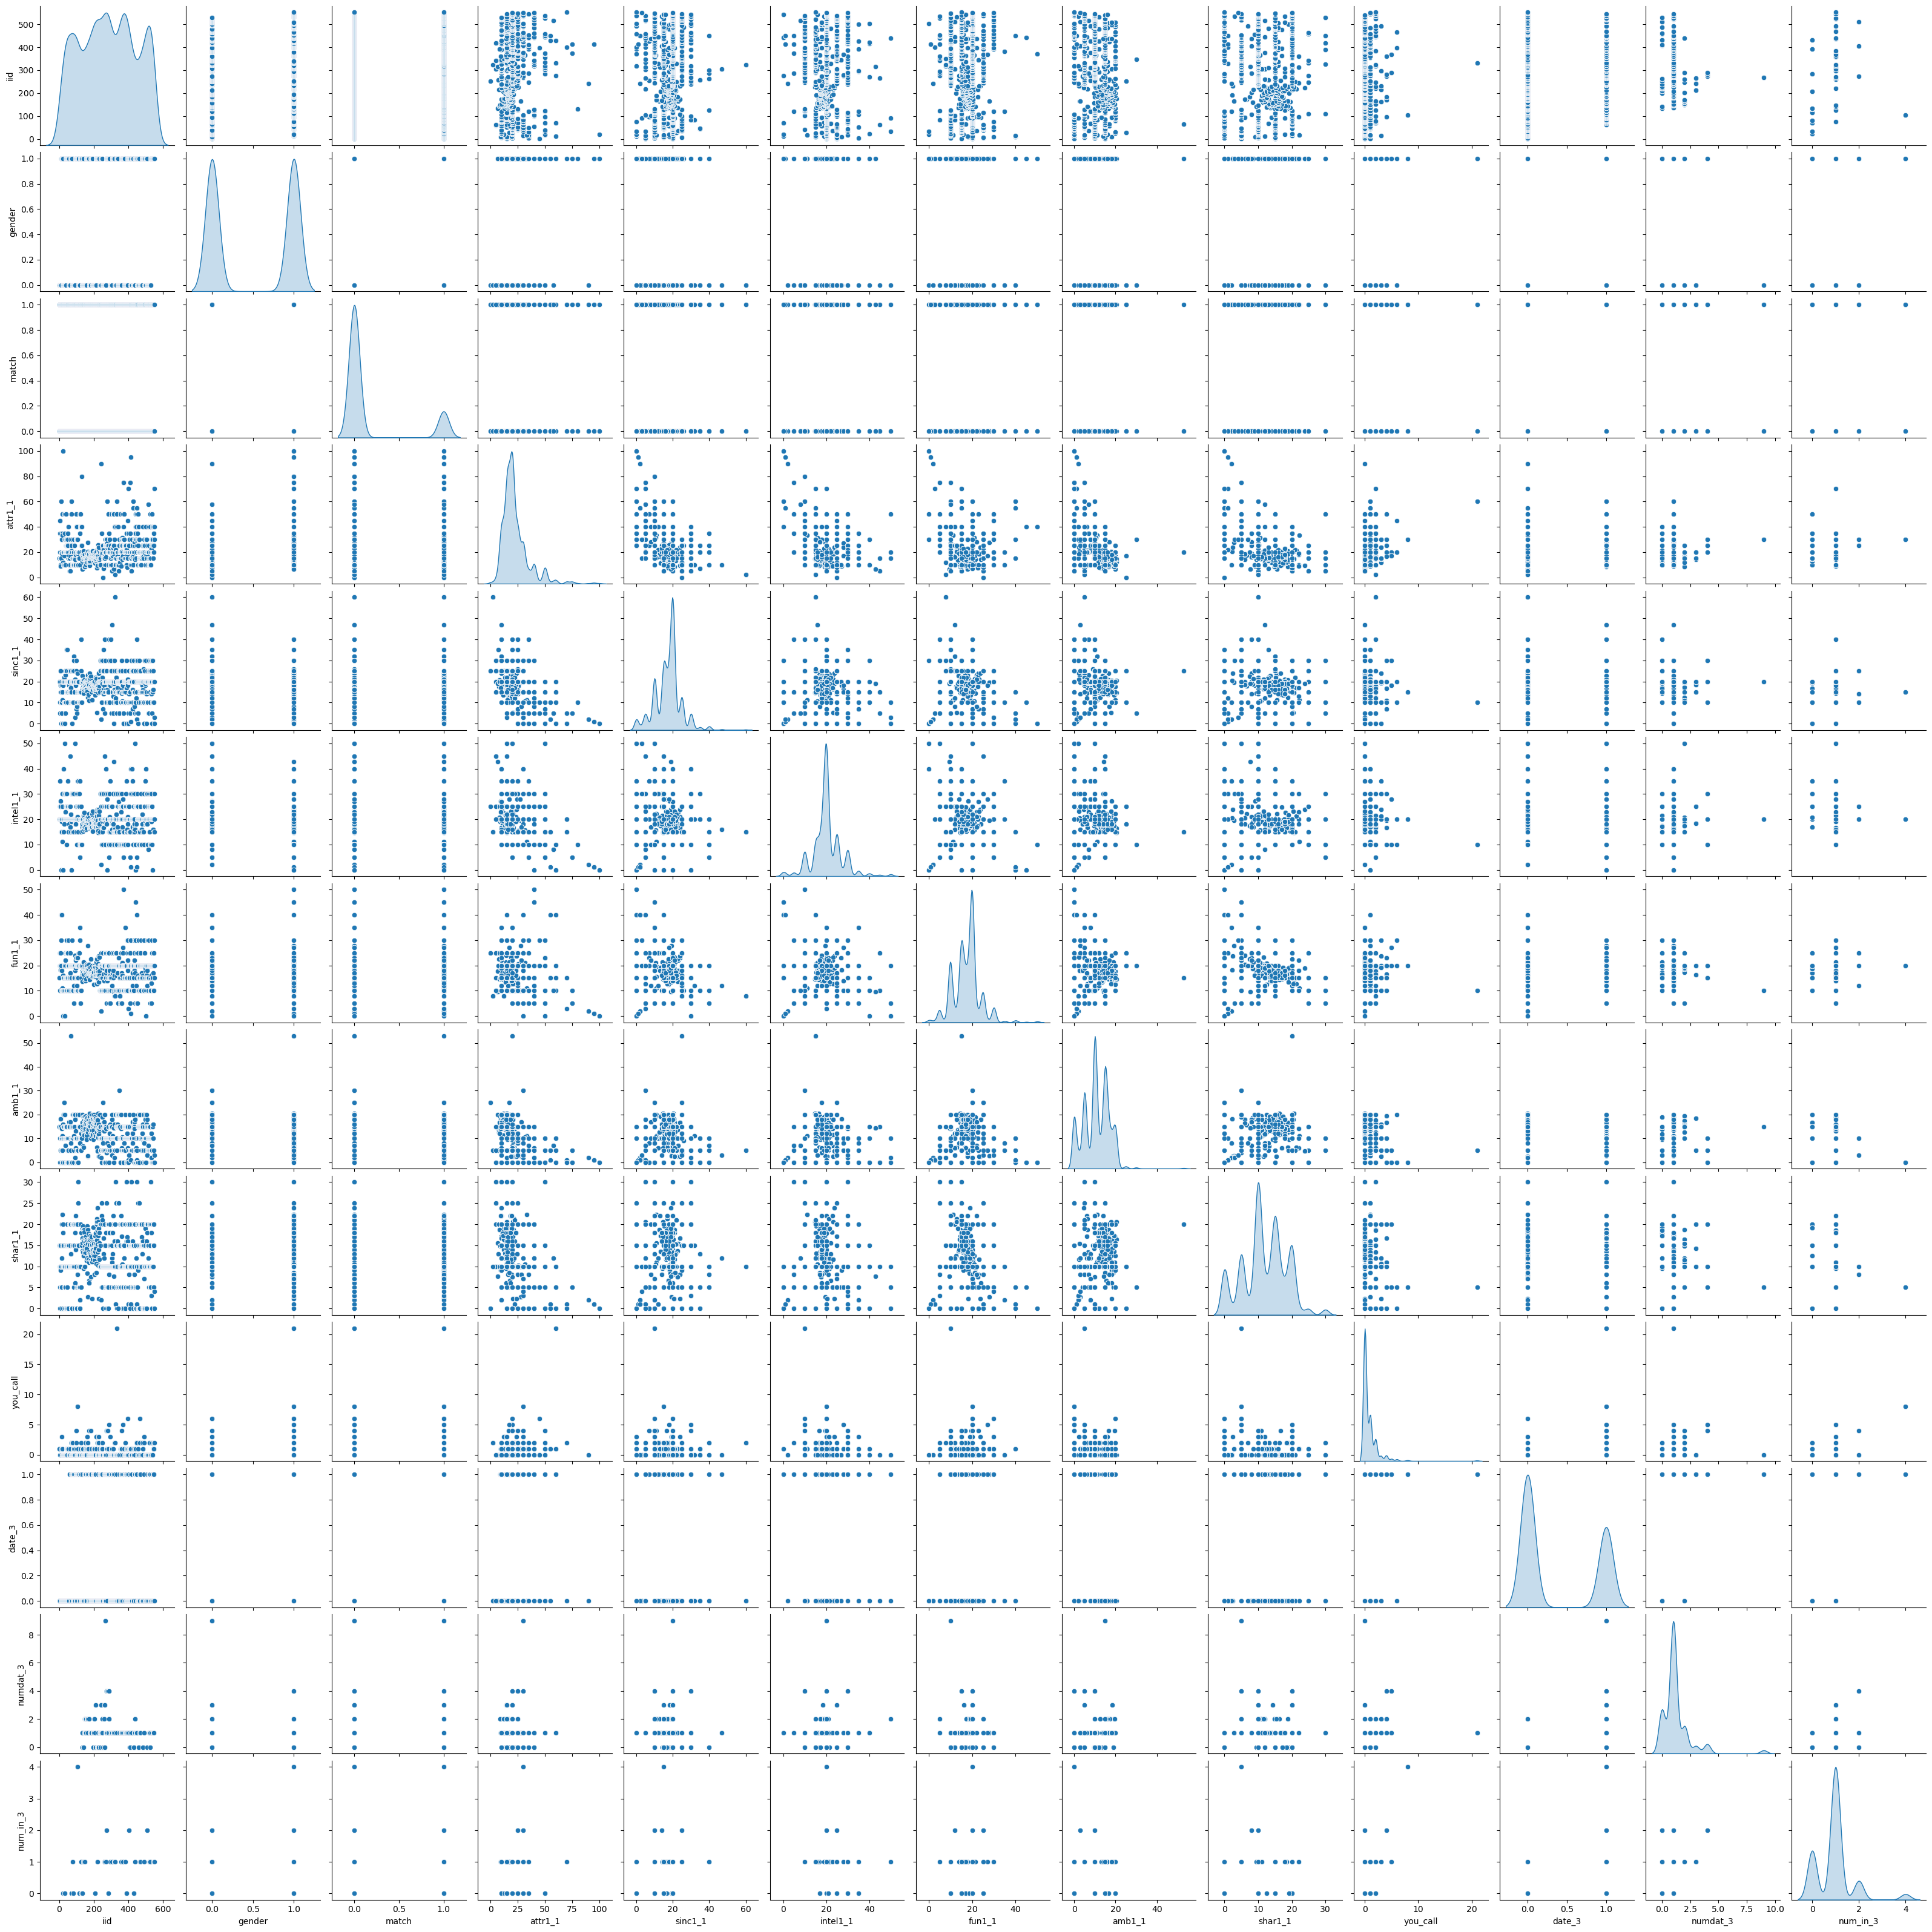

In [57]:
sns.pairplot(df_step_1, diag_kind='kde', corner=False)

We want to pay attention to the 'you_call' column - the remainder is informative, but welcome to confirm our observations so far.

Now here's something interesting: we can definitely notice trends when relating 'you_call' (in other words, what brought candidates to getting in touch with a date for a new meeting opportunity) to all attribute columns. It may seem obvious, but this does attract attention for our analysis:

In [58]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['attr1_1'],
    name="step 1 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['sinc1_1'],
    name="step 1 sincerity"
))

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['intel1_1'],
    name="step 1 intelligence"
))

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['fun1_1'],
    name="step 1 fun"
))

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['amb1_1'],
    name="step 1 ambition"
))

fig.add_trace(go.Bar(
    x=df_step_1['you_call'],
    y=df_step_1['shar1_1'],
    name="step 1 share interest"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(title={"text": "<b>Registration analysis</b>", "x": 0.5}, yaxis_title="Score")

fig.show()

*Now* we feel like we're on to something. We can see when registering, candidates expect to show interest in two attributes: attractiveness & intellect.

We used the "step 1" time, which matches registration; remember when we explained the meaning of **suffixes** earlier. What changes happen over time?

In [59]:
# We'll skip here the sanity check of displaying our data slice (verified while working on it) and go straight to the graphs:
info_list_step_s = ['iid', 'gender', 'match',
                    'attr1_s', 'sinc1_s', 'intel1_s', 
                    'fun1_s', 'amb1_s','shar1_s', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

df_step_s = df_original[info_list_step_s]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['attr1_s'],
    name="step s attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['sinc1_s'],
    name="step s sincerity"
))

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['intel1_s'],
    name="step s intelligence"
))

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['fun1_s'],
    name="step s fun"
))

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['amb1_s'],
    name="step s ambition"
))

fig.add_trace(go.Bar(
    x=df_step_s['you_call'],
    y=df_step_s['shar1_s'],
    name="step s share interest"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(title={"text": "<b>Halfway through the event</b>", "x": 0.5}, yaxis_title="Score")

fig.show()

We notice a slight change throughout the event, with attractiveness starting to play a more prominent role in deciding whether to call or not.

Let's keep going with the remaining timings, the day after the event and 3/4 weeks later:

In [60]:
info_list_step_2 = ['iid', 'gender', 'match',
                    'attr1_2', 'sinc1_2', 'intel1_2', 
                    'fun1_2', 'amb1_2','shar1_2', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

df_step_2 = df_original[info_list_step_2]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['attr1_2'],
    name="step 2 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['sinc1_2'],
    name="step 2 sincerity"
))

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['intel1_2'],
    name="step 2 intelligence"
))

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['fun1_2'],
    name="step 2 fun"
))

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['amb1_2'],
    name="step 2 ambition"
))

fig.add_trace(go.Bar(
    x=df_step_2['you_call'],
    y=df_step_2['shar1_2'],
    name="step 2 share interest"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(title={"text": "<b>The day after the event</b>", "x": 0.5}, yaxis_title="Score")

fig.show()

In [61]:
info_list_step_3 = ['iid', 'gender', 'match',
                    'attr1_3', 'sinc1_3', 'intel1_3', 
                    'fun1_3', 'amb1_3','shar1_3', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

df_step_3 = df_original[info_list_step_3]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['attr1_3'],
    name="step 3 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['sinc1_3'],
    name="step 3 sincerity"
))

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['intel1_3'],
    name="step 3 intelligence"
))

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['fun1_3'],
    name="step 3 fun"
))

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['amb1_3'],
    name="step 3 ambition"
))

fig.add_trace(go.Bar(
    x=df_step_3['you_call'],
    y=df_step_3['shar1_3'],
    name="step 3 share interest"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(title={"text": "<b>3/4 weeks later</b>", "x": 0.5}, yaxis_title="Score")

fig.show()

Though we can notice a slight change the day after (with 'fun' playing a larger part), the trend goes back to similar expectations to halfway through the event.

The one exception there being attractiveness resolutely becoming the leading factor in calling someone.

We could infer this is due to how Tinder works: what you're met with *first* is the picture of someone, *then* comes an actual date.

# Making our first inferences

As we just stated, we suspect the very basis on which Tinder works does incite in focusing on looks first and foremost.

However, other attributes often compete with attractiveness scorings - primarily intellect, otherwise sincerity & fun.

We could thus suggest Tinder to alter their events and offer different opportunities to meet *before* swiping left or right on a smartphone; this may come in competition with other actors on the market, *yet* it seems like Tinder's core practice is reaching its limits.

One thing remains though: being able to tell whether our observations are accurate or not. We've been able to avoid our missing values so far in our graphs, however we want to ascertain our inferences do relate to most candidates:

In [62]:
# For ease of reading, let's only consider one attribute - our leading attractiveness:
missing_values = df_original[['iid','wave','attr1_1', 'attr1_s','attr1_2','attr1_3']]
missing_values.head()

iid  wave  attr1_1  attr1_s  attr1_2  attr1_3
0    1     1     15.0      NaN    19.44     15.0
1    1     1     15.0      NaN    19.44     15.0
2    1     1     15.0      NaN    19.44     15.0
3    1     1     15.0      NaN    19.44     15.0
4    1     1     15.0      NaN    19.44     15.0

<Axes: >

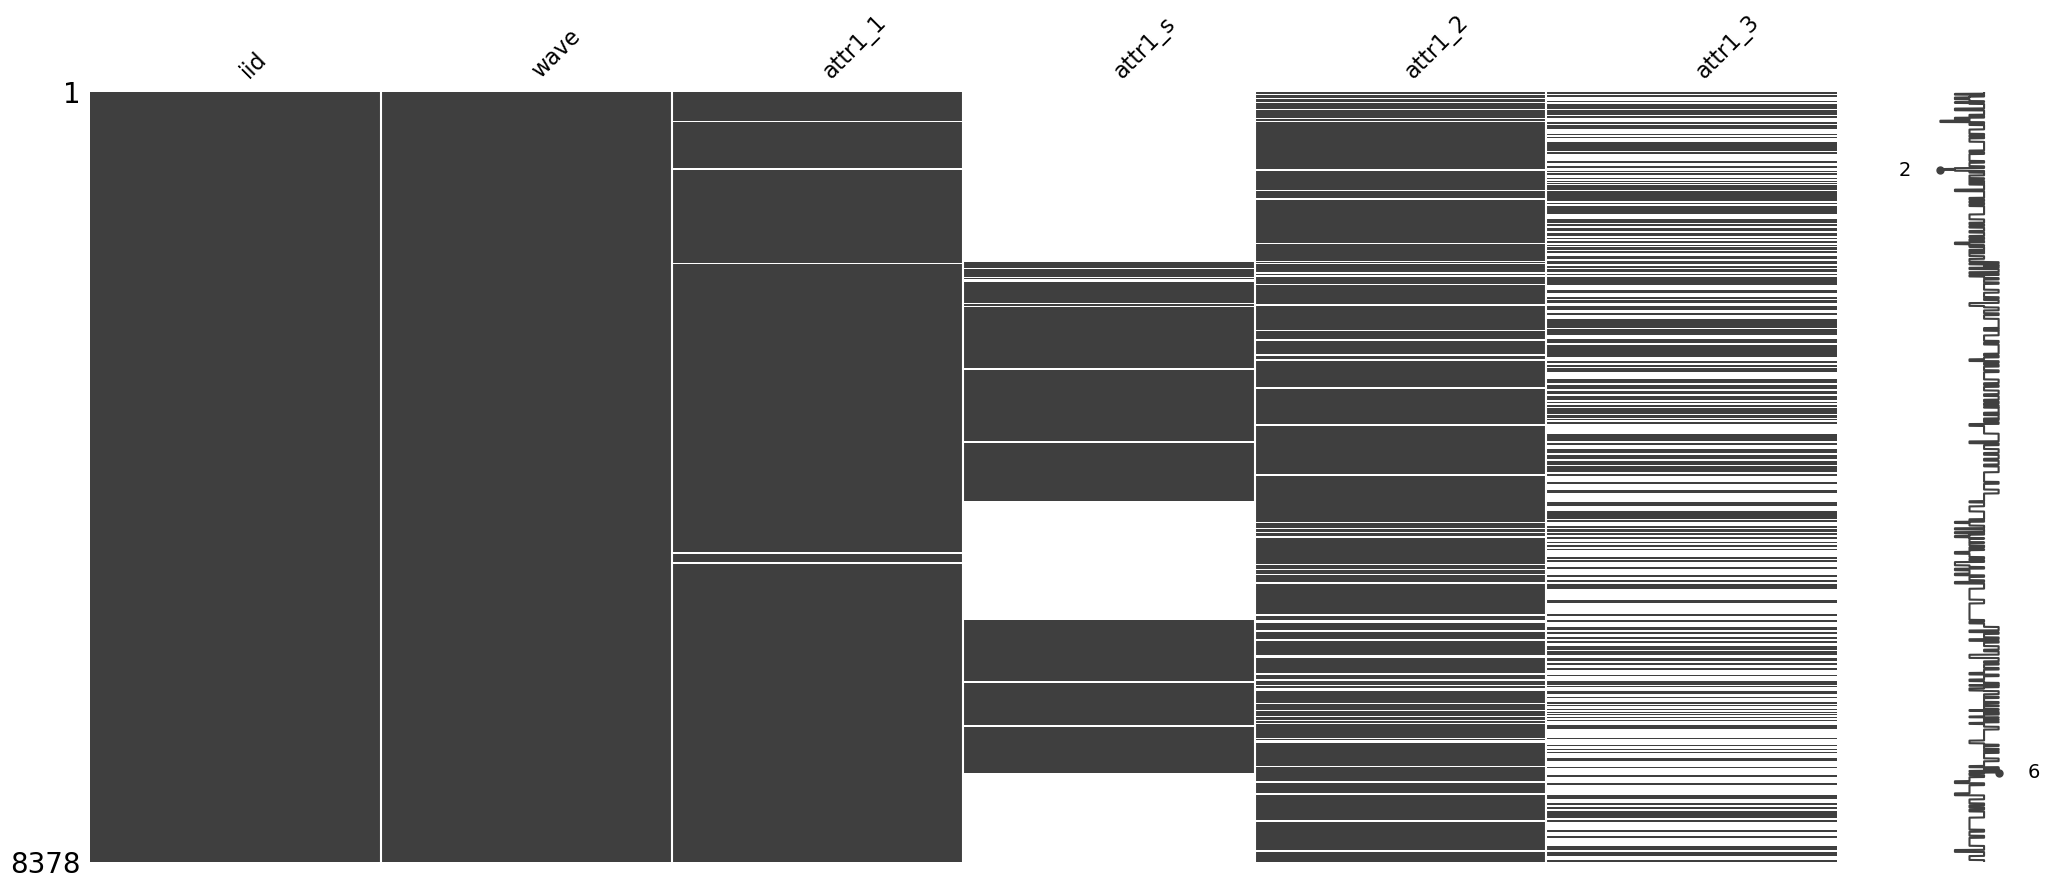

In [63]:
msno.matrix(missing_values)

'attr1_s' & 'attr1_3' aren't looking great here, and the "missing pattern" above does tell us one missing value in 1_s doesn't always mean another missing in 1_3.

Let's get the actual missing values of each of these columns:

In [64]:
print(f'Missing values for attr1_1: {(missing_values.attr1_1.isnull().sum()/len(missing_values.attr1_1))*100:.2f}%')
print(f'Missing values for attr1_s: {(missing_values.attr1_s.isnull().sum()/len(missing_values.attr1_s))*100:.2f}%')
print(f'Missing values for attr1_2: {(missing_values.attr1_2.isnull().sum()/len(missing_values.attr1_2))*100:.2f}%')
print(f'Missing values for attr1_3: {(missing_values.attr1_3.isnull().sum()/len(missing_values.attr1_3))*100:.2f}%')

Missing values for attr1_1: 0.94%
Missing values for attr1_s: 51.11%
Missing values for attr1_2: 11.14%
Missing values for attr1_3: 52.57%


While missing values' numbers are encouraging for our observations towards steps 1 (on registration) & 2 (the day after), not so much for the remaining steps.

Since half of our candidates' informations are missing, we must take with a grain of salt our insights towards the candidates' considerations during the event, and 3/4 weeks later.

The matrix above does denote an interesting trend: given its consistency, it seems like filling the form during the event (step s) was not applied to all waves.

On the other hand, we could infer step 3 (3/4 weeks later) missing values, despite being common to all waves, may be due to a loss of interest few weeks after the event.

Thus one last insight to conclude our analysis: the follow-up made by Tinder after the event could be worth attention to make candidates follow through!